In [2]:
import pandas as pd

df = pd.read_csv('./Iris.csv')

In [3]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


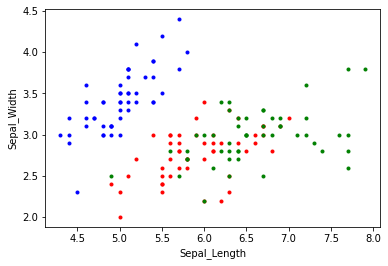

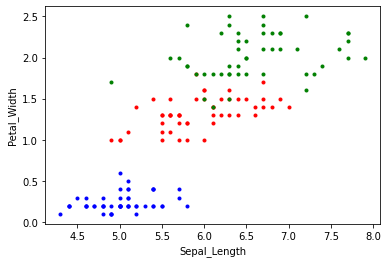

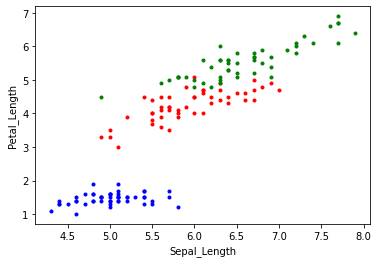

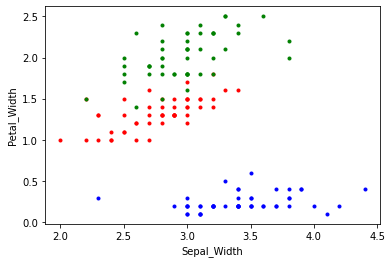

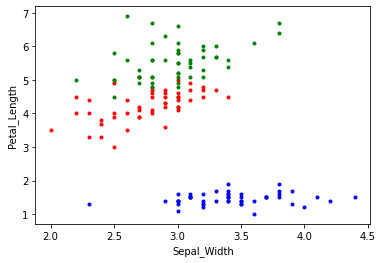

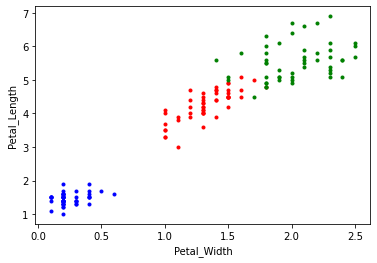

In [8]:
import matplotlib.pyplot as plt

def plot_for_two_features(feature1_name, feature2_name):
    plt.plot(df[df['Class'] == "Iris-setosa"][feature1_name],
             df[df['Class'] == "Iris-setosa"][feature2_name], 'b.')
    plt.plot(df[df['Class'] == "Iris-versicolor"][feature1_name],
             df[df['Class'] == "Iris-versicolor"][feature2_name], 'r.')
    plt.plot(df[df['Class'] == "Iris-virginica"][feature1_name],
             df[df['Class'] == "Iris-virginica"][feature2_name], 'g.')
    plt.xlabel(feature1_name)
    plt.ylabel(feature2_name)
    plt.show()
    
features = ['Sepal_Length', 'Sepal_Width', 'Petal_Width', 'Petal_Length']
for i in range(len(features)):
    for j in range(i+1, len(features)):
        plot_for_two_features(features[i], features[j])

In [15]:
def train_test_split(dataset, sizes = [0.8, 0.2], shuffle = True):
    if shuffle:
        dataset = dataset.sample(frac = 1, random_state = 40).reset_index(drop=True)
    return dataset.iloc[:int(sizes[0] * len(dataset))].reset_index(drop=True), dataset.iloc[int(sizes[0] * len(dataset)):].reset_index(drop=True)

train, test = train_test_split(df, [0.8, 0.2])
X_test, y_test = test.drop('Class', axis=1) , test['Class']

In [16]:
import numpy as np

def cal_distance(point1, point2):
    point1 = np.array(point1)
    point2 = np.array(point2)
    
    return sum((point1-point2)**2)

In [19]:
classes = ["Iris-virginica", "Iris-versicolor", "Iris-setosa"]
confusion_matrix = dict()
for i in range(len(classes)):
    for j in range(len(classes)):
        confusion_matrix[(classes[i], classes[j])] = 0
        
print(confusion_matrix)

{('Iris-virginica', 'Iris-virginica'): 0, ('Iris-virginica', 'Iris-versicolor'): 0, ('Iris-virginica', 'Iris-setosa'): 0, ('Iris-versicolor', 'Iris-virginica'): 0, ('Iris-versicolor', 'Iris-versicolor'): 0, ('Iris-versicolor', 'Iris-setosa'): 0, ('Iris-setosa', 'Iris-virginica'): 0, ('Iris-setosa', 'Iris-versicolor'): 0, ('Iris-setosa', 'Iris-setosa'): 0}


In [23]:
mu_virginica = train[train['Class'] == "Iris-virginica"].mean().values
mu_setosa = train[train['Class'] == "Iris-setosa"].mean().values
mu_versicolor = train[train['Class'] == "Iris-versicolor"].mean().values

<ipython-input-23-1c761b5a18e8>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mu_virginica = train[train['Class'] == "Iris-virginica"].mean().values
<ipython-input-23-1c761b5a18e8>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mu_setosa = train[train['Class'] == "Iris-setosa"].mean().values
<ipython-input-23-1c761b5a18e8>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mu_versicolor = train[train['Class'] == "Iris-versicolor"].mean().values


In [31]:
mu_s = [mu_virginica, mu_versicolor, mu_setosa]

for i in range(len(X_test)):
    selected_index = 0
    min_distance = float('inf')
    
    for j in range(len(mu_s)):
        distance = cal_distance(mu_s[j], X_test.iloc[i].values)
        if distance < min_distance:
            min_distance = distance
            selected_index = j

    confusion_matrix[(y_test[i], classes[selected_index])] += 1 

In [32]:
confusion_matrix

{('Iris-virginica', 'Iris-virginica'): 5,
 ('Iris-virginica', 'Iris-versicolor'): 2,
 ('Iris-virginica', 'Iris-setosa'): 0,
 ('Iris-versicolor', 'Iris-virginica'): 1,
 ('Iris-versicolor', 'Iris-versicolor'): 10,
 ('Iris-versicolor', 'Iris-setosa'): 0,
 ('Iris-setosa', 'Iris-virginica'): 0,
 ('Iris-setosa', 'Iris-versicolor'): 0,
 ('Iris-setosa', 'Iris-setosa'): 12}

In [39]:
from texttable import Texttable

values = list(confusion_matrix.values())

table = Texttable()
table.add_row(['Actual | Predicted', 'Predicted : \n  virginica', 'Predicted : \n  versicolor', 'Predicted : \n  setosa'])
table.add_row(['Actual : \n  virginica', str(values[0]), str(values[1]), str(values[2])])
table.add_row(['Actual : \n  versicolor', str(values[3]), str(values[4]), str(values[5])])
table.add_row(['Actual : \n  setosa', str(values[6]), str(values[7]), str(values[8])])
print(table.draw())

+--------------------+--------------+--------------+--------------+
| Actual | Predicted | Predicted :  | Predicted :  | Predicted :  |
|                    |   virginica  |   versicolor |   setosa     |
+--------------------+--------------+--------------+--------------+
| Actual :           | 5            | 2            | 0            |
|   virginica        |              |              |              |
+--------------------+--------------+--------------+--------------+
| Actual :           | 1            | 10           | 0            |
|   versicolor       |              |              |              |
+--------------------+--------------+--------------+--------------+
| Actual :           | 0            | 0            | 12           |
|   setosa           |              |              |              |
+--------------------+--------------+--------------+--------------+


In [40]:
accuracy = (values[0] + values[4] + values[8]) / len(y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9


In [42]:
from sklearn.model_selection import train_test_split

df = pd.read_csv("Iris.csv")
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis = 1), df['Class'], test_size = 0.2)

In [44]:
from sklearn.neighbors import NearestCentroid

model = NearestCentroid()
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, predict))

[[ 7  0  0]
 [ 0 12  0]
 [ 0  2  9]]


In [47]:
accuracy = accuracy_score(y_test, predict)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9333333333333333


In [64]:
predict

array(['Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor'],
      dtype=object)

In [65]:
class_labels = {'Iris-versicolor': 1, 'Iris-virginica': 2, 'Iris-setosa': 3}
a = []
p = []
for val in y_test:
    a.append(class_labels[val])
for val in predict:
    p.append(class_labels[val])

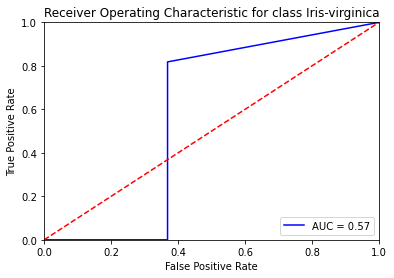

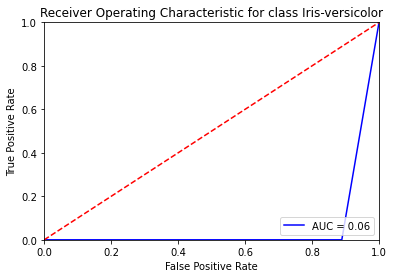

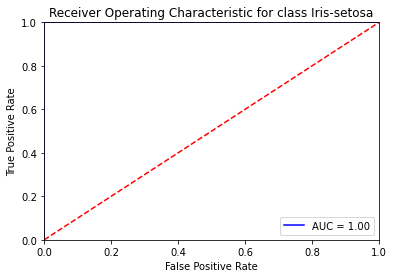

In [70]:
from sklearn.metrics import roc_curve, auc

for class_name in classes:
    fpr, tpr, threshold = roc_curve(a, p, pos_label=class_labels[class_name])
    roc_auc = auc(fpr, tpr)

    plt.title(f'Receiver Operating Characteristic for class {class_name}')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()